In [222]:
import requests, zipfile, io
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Task 3: Perform basic data engineering.


##### 1.  (Data Extraction, Selection and Transformation)

In [19]:
#1,2: First, download the zip file and unzip to access it.
current_dir=os.getcwd()
for i in range(1975,2021,5):
    r = requests.get('https://static.nhtsa.gov/nhtsa/downloads/FARS/'+str(i)+'/National/FARS'+str(i)+'NationalCSV.zip')
    z = zipfile.ZipFile(io.BytesIO(r.content))
    path=os.path.join(current_dir,'op',str(i))
    z.extractall(path)

In [18]:
#3) copy to accident_all_years
parent_dir=os.getcwd()
directory="accident_all_years"
path = os.path.join(parent_dir, directory)
os.mkdir(path)



In [30]:
for i in range(1975,2020,5):
    path=os.path.join(parent_dir,'op',str(i),'ACCIDENT.csv')
    move_path=os.path.join(parent_dir,'accident_all_years',str(i)+'_accident.csv')
    shutil.copy(path, move_path)


# Task 3: Manipulate and analyze the data from NHTSA.

##### 1.  (Descriptive Statistics / Exploratory Data Analysis).


In [120]:

all_fatal=0
overall_accidents=0
number_of_fatalities=0
number_of_persons=0
accidents_at_midnight=0
snowy_weather=0
fatalities=[]
years=[]
for i in range(1975,2021,5):
    path=('accident_all_years/'+str(i)+'_accident.csv')
    df=pd.read_csv(path,encoding='latin-1')
    years.append(i)
    overall_accidents+=df.shape[0]
    fatalities.append(df['FATALS'].sum())
    all_fatal+= df[df['FATALS'] > 0]['FATALS'].count()
    number_of_fatalities+=df['FATALS'].sum()
    number_of_persons+=df['PERSONS'].sum()
    accidents_at_midnight+=df[(df['HOUR']>21) | (df['HOUR']<=4)]['HOUR'].count()
    snowy_weather+=df[df['WEATHER']==4]['WEATHER'].count()
    

    
    


In [348]:
#a) overall number of fatal accidents
print("total fatal accidents",all_fatal/overall_accidents)
# b) total death, total involved
print("number of deaths",number_of_fatalities)
print("total number involved",number_of_persons)
# c) accidents between 9-4
print("between 9 pm to 4 am",accidents_at_midnight)
#d ) when snowy weather
print("when snowy weather",snowy_weather)

total fatal accidents 0.9999734110439887
number of deaths 418619
total number involved 955696
between 9 pm to 4 am 114622
when snowy weather 6149


<AxesSubplot:>

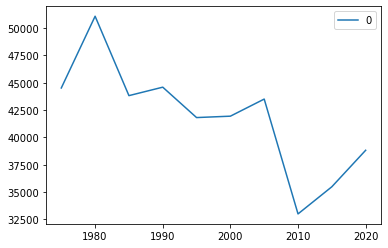

In [122]:
#e) graph of fatalities over years 
to_plot=pd.DataFrame(fatalities,index=years)
to_plot.plot()

f) Observation : the number of deaths reduces over the years and drops to the lowest during the year 2010. People have now become more mindful and are safe.

##### 2. (Descriptive Statistics / Exploratory Data Analysis)


In [353]:
#a) The average (mean) rate of fatal accidents which involved an intoxicated driver.
fatal=0
intoxicated=0
overall_rate=0
for i in range(1975,2021,5):
    path=('accident_all_years/'+str(i)+'_accident.csv')
    df=pd.read_csv(path,encoding='latin-1')
    total_acci= df['FATALS'].count()
    intoxicated=df[(df['FATALS'] > 0) & ( df['DRUNK_DR']>0)]['DRUNK_DR'].count()
    overall_rate+=(intoxicated/total_acci)


In [354]:
print("average accidents",overall_rate/len(years))

average accidents 0.32852638414944624


In [355]:
# b) top 5, bottom 5
df=pd.read_csv('accident_all_years/1975_accident.csv')
df2=df[(df['FATALS'] > 0) & ( df['DRUNK_DR']>0)]
d4=df2.groupby(['STATE']).agg("count")

In [199]:
df5=d4.reset_index().sort_values("FATALS",ascending=False).set_index(['STATE',"FATALS"])

In [200]:
df5.head() # top 5

,,DISTRICT,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,...,ARRAY_MIN,SCH_BUS,CF_1,CF_2,CF_3,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
6,1450,1450,1450,1450,1450,1450,1450,1450,1450,0,1450,...,1450,0,1450,1450,1450,1450,1450,1450,1450,1450
26,424,424,424,424,424,424,424,424,424,0,424,...,424,0,424,424,424,424,424,424,424,424
17,387,387,387,387,387,387,387,387,387,0,387,...,387,0,387,387,387,387,387,387,387,387
12,384,384,384,384,384,384,384,384,384,0,384,...,384,0,384,384,384,384,384,384,384,384
47,333,333,333,333,333,333,333,333,333,0,333,...,333,0,333,333,333,333,333,333,333,333


In [356]:
df5.tail() # leaat 5

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PER_MVIT,PERNOT_MVIT,...,NOT_MINIMUMNAME,ARRAY_HOUR,ARRAY_HOURNAME,ARRAY_MIN,ARR_MINNAME,HOSPITAL_HR,HOSPITAL_HRNAME,HOSPITAL_MN,HOSPITAL_MNNAME,DRUNK_DR
FATALS,,,,,,,,,,,,,,,,,,,,,
25,44,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
22,10,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
19,50,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
16,2,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
9,11,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [202]:
#c) By 1990, how much had the top and bottom 5 changed
df=pd.read_csv('accident_all_years/1990_accident.csv')
df2=df[(df['FATALS'] > 0) & ( df['DRUNK_DR']>0)]
d4=df2.groupby(['STATE']).agg("count")
df5=d4.reset_index().sort_values("FATALS",ascending=False).set_index(['STATE',"FATALS"])

In [203]:
df5.head()

,,DISTRICT,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,FEDER_AID,ROAD_FUNCT,...,CF_1,CF_2,CF_3,DAY_WEEK,DRUNK_DR,ST_CASE,MILEPT,CITY,TWAY_IDENTITY,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
6,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,...,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975
48,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,...,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265
12,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
42,623,623,623,623,623,623,623,623,623,623,623,...,623,623,623,623,623,623,623,623,623,623
26,617,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,617


There is change in top 5. State 26 reduced deaths, while state 48 increased in number of deaths. State 6 continues to be on the top but

In [204]:
df5.tail()

,,DISTRICT,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,FEDER_AID,ROAD_FUNCT,...,CF_1,CF_2,CF_3,DAY_WEEK,DRUNK_DR,ST_CASE,MILEPT,CITY,TWAY_IDENTITY,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
38,48,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
50,44,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
44,41,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
2,41,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
11,20,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


For bottom 5 all the states have changed

In [212]:
#d) average (mean) rate in 2020
df=pd.read_csv('accident_all_years/2020_accident.csv',encoding='latin-1')
df2=df[(df['FATALS'] > 0) & ( df['DRUNK_DR']>0)]['FATALS']
df2.agg("mean")

1.108698001080497

In [359]:
#e) top and bottom five states, showing just the rate over time
years=[]
fatalities=[]
fatalities2=[]

for i in range(1975,2021,5):
    path=('accident_all_years/'+str(i)+'_accident.csv')
    df=pd.read_csv(path,encoding='latin-1')
    df2=df[(df['FATALS'] > 0) & ( df['DRUNK_DR']>0)]
    d4=df2.groupby(['STATE']).agg("count")
    df5=d4.reset_index().sort_values("FATALS",ascending=False).set_index(["FATALS"])
    top=df5.head()
    bot=df5.tail()
    years.append(i)
    lst=top['DRUNK_DR'].tolist()
    lst2=bot['DRUNK_DR'].tolist()
    fatalities.append(lst)
    fatalities2.append(lst2)
    #plt.bar(top['STATE'],top['DRUNK_DR'])


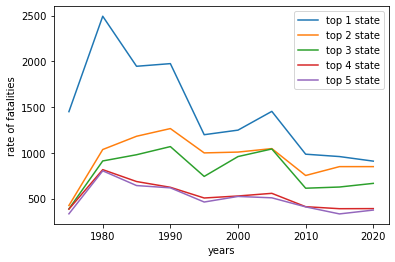

In [254]:
#top 5
arr=np.array(fatalities)
for i in range(5):
    y=arr[:,i]
    plt.plot(years,y,label="top "+str(i+1)+" state")
plt.xlabel("years")
plt.ylabel("rate of fatalities")
plt.legend()
plt.show()

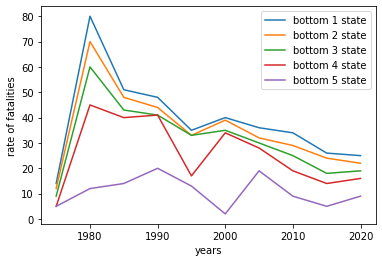

In [360]:
arr=np.array(fatalities2)
for i in range(5):
    y=arr[:,i]
    plt.plot(years,y,label="bottom "+str(i+1)+" state")
plt.xlabel("years")
plt.ylabel("rate of fatalities")
plt.legend()
plt.show()

f) The rates of fatalites have reduced for both the top 5 and the bottom 5. Anyhow, in the 1980's, the rates were the highest for both the top 5 and the bottom 5

##### 3. Distance Metrics / Exploratory Data Analysis)


In [284]:
#a) Df with certain columns
colnames=['STATE','MONTH','DAY','YEAR','HOUR','PERSONS','MAN_COLL','LGT_COND','WEATHER','SCH_BUS','FATALS','DAY_WEEK','DRUNK_DR']
df_final=pd.DataFrame(columns=colnames)
for i in range(1975,2021,5):
    path=('accident_all_years/'+str(i)+'_accident.csv')
    df=pd.read_csv(path,encoding='latin-1')
    df=df[colnames]
    df= df.fillna(0)
    df2=df.sample(n=500)
    df_final=df_final.append(df2)


In [285]:
from sklearn.preprocessing import MinMaxScaler


In [286]:
#b) scale data from 0-1
scaler = MinMaxScaler()
model=scaler.fit(df_final)
scaled_data=model.transform(df_final)

In [289]:
#c) Euclidian distance
from sklearn.metrics.pairwise import euclidean_distances
# dist = DistanceMetric.get_metric('euclidean')
table=euclidean_distances(scaled_data,scaled_data)

In [294]:
table.shape

(5000, 5000)

In [314]:
#20 nearest neighbours
import sys
euc=np.array(table[457])
arg=euc.argsort()
arg[:20]
print(df_final.iloc[457])
for i in range(20):
    print(df_final.iloc[arg[i]])

STATE       48
MONTH        1
DAY          1
YEAR        75
HOUR         8
PERSONS      1
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 32993, dtype: object
STATE       48
MONTH        1
DAY          1
YEAR        75
HOUR         8
PERSONS      1
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 32993, dtype: object
STATE       48
MONTH        1
DAY          9
YEAR        90
HOUR        10
PERSONS      1
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     3
DRUNK_DR     0
Name: 33804, dtype: object
STATE       54
MONTH        1
DAY         11
YEAR        95
HOUR        10
PERSONS      2
MAN_COLL     4
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 36103, dtype: object
STATE       45
MONTH        1
DAY          9
YEAR        90
HOUR        14
PERSONS      3
MAN_COLL     6
LGT_CON

Overall, identical accidents to the test data have occured before the year 2000.

In [315]:
euc=np.array(table[6])
arg=euc.argsort()
arg[:20]
print(df_final.iloc[6])
for i in range(20):
    print(df_final.iloc[arg[i]])

STATE        6
MONTH        4
DAY         29
YEAR        75
HOUR        23
PERSONS      5
MAN_COLL     1
LGT_COND     3
WEATHER      1
SCH_BUS      0
FATALS       2
DAY_WEEK     3
DRUNK_DR     0
Name: 2929, dtype: object
STATE        6
MONTH        4
DAY         29
YEAR        75
HOUR        23
PERSONS      5
MAN_COLL     1
LGT_COND     3
WEATHER      1
SCH_BUS      0
FATALS       2
DAY_WEEK     3
DRUNK_DR     0
Name: 2929, dtype: object
STATE        1
MONTH        4
DAY         21
YEAR        80
HOUR        23
PERSONS      5
MAN_COLL     2
LGT_COND     2
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     2
DRUNK_DR     0
Name: 235, dtype: object
STATE        6
MONTH        3
DAY         11
YEAR        80
HOUR        18
PERSONS      5
MAN_COLL     2
LGT_COND     2
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     3
DRUNK_DR     0
Name: 2858, dtype: object
STATE       17
MONTH        5
DAY         28
YEAR        90
HOUR        23
PERSONS      3
MAN_COLL     4
LGT_COND    

Overall, the 20 most similar data have resulted in a fatality, but without a drunken driver.

#### 4. (PCA(Principal component analysis / Exploratory Data Analysis.

In [316]:
from sklearn import decomposition


In [319]:
# a) components to capture 90% data and plot
pca = decomposition.PCA()

pca2 = pca.fit_transform(scaled_data)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


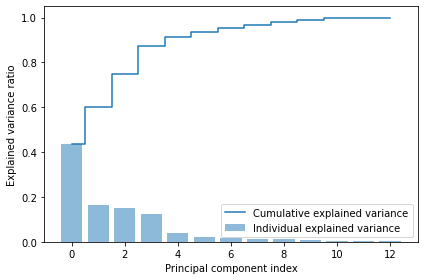

In [320]:
#plot 
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [321]:
cum_sum_eigenvalues
# 4 components 

array([0.43495129, 0.59920382, 0.74970492, 0.8721205 , 0.91144373,
       0.93472702, 0.95271906, 0.96734488, 0.98178365, 0.99045194,
       0.99610181, 0.99841823, 1.        ])

Hence, 4 components are required for getting 90% variance 

In [331]:
# feature dominating the first component
pca = decomposition.PCA(n_components=12)
fin = pca.fit_transform(scaled_data)
exp_var_pca = pca.explained_variance_ratio_
impones=exp_var_pca.argsort()

In [345]:
impnes=(abs( pca.components_ )[0]).argsort()
impnes

array([ 9,  7,  4, 10, 12,  2,  5,  1,  6,  0, 11,  8,  3], dtype=int64)

In [364]:
print("the column that is dominating first component is ",colnames[impnes[-1]])

the column that is dominating first component is  YEAR
